# Graded Assignment 3: 9 to 5

Time to show off your SQL skills! For each question, copy the SQL query you used and make note of the answer.

## The Dataset

For this assignment, you will be using the Bureau of Labor Statistics (BLS) Current Employment Survey (CES) results which can be found on [Kaggle](https://www.kaggle.com/datasets/bls/employment).

## Business Issue

You are working for the Bureau of Labor Statistics with the United States government and have been approached by your boss with an important meeting request. You have been asked by your supervisor to meet with Dolly Parton whose nonprofit is looking to shed light on the state of employment in the United States. As part of the 9 to 5 project, their research is focused on production and nonsupervisory employees and how those employees fare compared to all employees in the United States. While the data the BLS collects from the CES is publicly available, Dolly Parton and her colleagues need your assistance navigating the thousands of rows in each table in LaborStatisticsDB.

## About the Dataset

This dataset comes directly from the Bureau of Labor Statistics’ Current Employment Survey (CES). Here are some things you need to know:

1. The industry table contains an NAICS code. This is different from the industry code. NAICS stands for North American Industry Classification System.
1. Series ID is composed of multiple different codes. CES stands for Current Employment Survey, the name of the survey which collected the data. The industry code as specified by the BLS and the data type code as specified in the datatype table.

## Set Up

To connect to the database, use the same connection info used during the SQL lessons. 

For the assignment, we will be using `LaborStatisticsDB`.

## Database Exploration

To start with, let’s get to know the database further.

1. Use this space to make note of each table in the database, the columns within each table, each column’s data type, and how the tables are connected. You can write this down or draw a diagram. Whatever method helps you get an understanding of what is going on with `LaborStatisticsDB`.
   
   To add a photo, diagram or document to your file, drop the file into the folder that holds this notebook.  Use the link button to the right of the  </> symbol in the gray part of this cell, the link is just the name of your file.

![data core.png](<attachment:data core.png>)
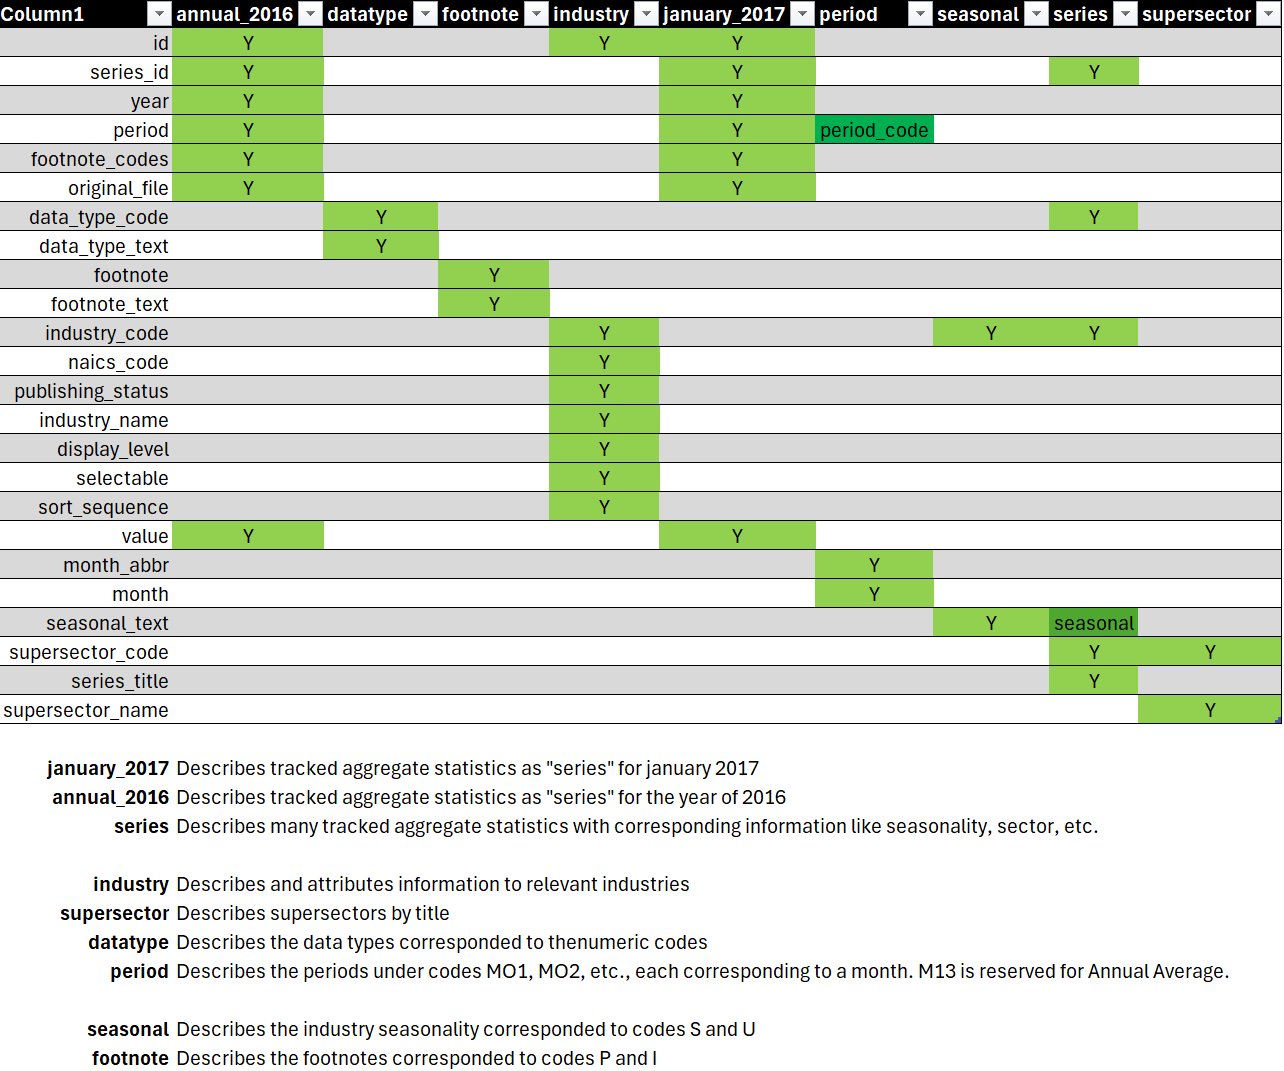

2. What is the datatype for women employees?

In [ ]:
SELECT * FROM LaborStatisticsDB.dbo.datatype
WHERE data_type_text LIKE 'women employees'

-- '10' is the datatype

3. What is the series id for  women employees in the commercial banking industry in the financial activities supersector?

In [ ]:
SELECT series_id AS 'Series ID', seasonal_text AS 'Adjusted or Not'
FROM LaborStatisticsDB.dbo.series AS s1
JOIN LaborStatisticsDB.dbo.seasonal AS s2 
ON s1.seasonal = s2.industry_code
WHERE 
    supersector_code = (
    SELECT supersector_code 
    FROM LaborStatisticsDB.dbo.supersector
    WHERE supersector_name 
    LIKE '%financial%'
    )
    AND data_type_code = (
    SELECT data_type_code
    FROM LaborStatisticsDB.dbo.datatype
    WHERE data_type_text LIKE 'women employees'
    )
    AND s1.industry_code = (
        SELECT industry_code FROM LaborStatisticsDB.dbo.industry
        WHERE industry_name = 'Commercial banking'
    )

-- CES5552211010 for seasonally adjusted
-- CEU5552211010 for Not seasonally adjusted

## Aggregate Your Friends and Code some SQL

Put together the following:

1. How many employees were reported in 2016 in all industries? Round to the nearest whole number.

In [ ]:
SELECT CAST(ROUND(1000*SUM(value), 0) as INT)
FROM LaborStatisticsDB.dbo.industry AS i
LEFT JOIN LaborStatisticsDB.dbo.series AS s 
    ON i.industry_code = s.industry_code
LEFT JOIN LaborStatisticsDB.dbo.annual_2016 AS a
    ON a.series_id = s.series_id
WHERE industry_name LIKE 'Total nonfarm'
    AND original_file LIKE '%allcesseries%'
    AND series_title LIKE 'All employees';

-- 144,306,000 Non-farm employees counted in survey

2. How many women employees were reported in 2016 in all industries? Round to the nearest whole number. 

In [ ]:
SELECT CAST(ROUND(1000*SUM(value), 0) as INT)
FROM LaborStatisticsDB.dbo.industry AS i
LEFT JOIN LaborStatisticsDB.dbo.series AS s 
    ON i.industry_code = s.industry_code
LEFT JOIN LaborStatisticsDB.dbo.annual_2016 AS a
    ON a.series_id = s.series_id
WHERE industry_name LIKE 'Total nonfarm'
    AND original_file LIKE '%allcesseries%'
    AND series_title LIKE 'Women employees'

-- 71,492,000 Women employees counted in survey

3. How many production/nonsupervisory employees were reported in 2016? Round to the nearest whole number. 

In [ ]:
SELECT FORMAT(SUM(value)*1000, 'N0')
FROM LaborStatisticsDB.dbo.january_2017 AS j
JOIN LaborStatisticsDB.dbo.series 
    AS s 
    ON j.series_id = s.series_id
JOIN LaborStatisticsDB.dbo.industry 
    AS i 
    ON s.industry_code = i.industry_code
WHERE original_file LIKE '%allcesseries%' 
    AND series_title LIKE 'Production and nonsupervisory employees'
    AND j.series_id LIKE '%CES%'
    AND LEN(naics_code) = 2

-- 65,372,400

4. In January 2017, what is the average weekly hours worked by production and nonsupervisory employees across all industries?

In [ ]:
SELECT ROUND(AVG(value), 1) AS 'Average weekly hours of production and nonsupervisory employees across industry'
FROM LaborStatisticsDB.dbo.january_2017 AS j
LEFT JOIN LaborStatisticsDB.dbo.series AS s
    ON s.series_id = j.series_id
WHERE series_title LIKE 'Average weekly hours of production and nonsupervisory employees'
    AND original_file LIKE '%allcesseries%'

-- 36.1

5. What is the total weekly payroll for production and nonsupervisory employees across all industries in January 2017? Round to the nearest penny.

In [ ]:
SELECT FORMAT(SUM(value), 'N0')
FROM LaborStatisticsDB.dbo.january_2017 AS j
JOIN LaborStatisticsDB.dbo.series 
    AS s 
    ON j.series_id = s.series_id
JOIN LaborStatisticsDB.dbo.industry 
    AS i 
    ON s.industry_code = i.industry_code
WHERE original_file LIKE '%allcesseries%' 
    AND series_title LIKE 'Aggregate weekly payrolls of production and nonsupervisory employees'
    AND j.series_id LIKE '%CES%'
    AND LEN(naics_code) = 2

-- 48,944,035

6. In January 2017, for which industry was the average weekly hours worked by production and nonsupervisory employees the highest? Which industry was the lowest?

In [ ]:
SELECT TOP 1 industry_name, series_title, value
FROM LaborStatisticsDB.dbo.january_2017 AS j
JOIN LaborStatisticsDB.dbo.series 
    AS s 
    ON j.series_id = s.series_id
JOIN LaborStatisticsDB.dbo.industry 
    AS i 
    ON s.industry_code = i.industry_code
WHERE original_file LIKE '%allcesseries%' 
    AND series_title LIKE 'Average weekly hours of production and nonsupervisory employees'
    AND j.series_id LIKE '%CES%'
ORDER BY value DESC
-- TOP: Motor vehicle power train components, 49.8 HRS

SELECT TOP 1 industry_name, series_title, value
FROM LaborStatisticsDB.dbo.january_2017 AS j
JOIN LaborStatisticsDB.dbo.series 
    AS s 
    ON j.series_id = s.series_id
JOIN LaborStatisticsDB.dbo.industry 
    AS i 
    ON s.industry_code = i.industry_code
WHERE original_file LIKE '%allcesseries%' 
    AND series_title LIKE 'Average weekly hours of production and nonsupervisory employees'
    AND j.series_id LIKE '%CES%'
ORDER BY value ASC
-- BOTTOM: Fitness and recreational sports centers, 17 HRS

7. In January 2021, for which industry was the total weekly payroll for production and nonsupervisory employees the highest? Which industry was the lowest?

In [ ]:
SELECT TOP 1 industry_name, series_title, FORMAT(value, 'N0')
FROM LaborStatisticsDB.dbo.january_2017 AS j
JOIN LaborStatisticsDB.dbo.series 
    AS s 
    ON j.series_id = s.series_id
JOIN LaborStatisticsDB.dbo.industry 
    AS i 
    ON s.industry_code = i.industry_code
WHERE original_file LIKE '%allcesseries%' 
    AND series_title LIKE 'Aggregate weekly payrolls of production and nonsupervisory employees'
    AND j.series_id LIKE '%CES%'
    AND LEN(naics_code) = 2
ORDER BY value DESC;
GO

-- Highest - Health care and social assistance, 12,762,526

SELECT TOP 1 industry_name, series_title, FORMAT(value, 'N0')
FROM LaborStatisticsDB.dbo.january_2017 AS j
JOIN LaborStatisticsDB.dbo.series 
    AS s 
    ON j.series_id = s.series_id
JOIN LaborStatisticsDB.dbo.industry 
    AS i 
    ON s.industry_code = i.industry_code
WHERE original_file LIKE '%allcesseries%' 
    AND series_title LIKE 'Aggregate weekly payrolls of production and nonsupervisory employees'
    AND j.series_id LIKE '%CES%'
    AND LEN(naics_code) = 2
ORDER BY value ASC;
GO

-- Lowest - Mining, 557,736


## Join in on the Fun

Time to start joining! You can choose the type of join you use, just make sure to make a  note!

1. Join `annual_2016` with `series` on `series_id`. We only want the data in the `annual_2016` table to be included in the result.

In [ ]:
-- Limiting rows returned from query, uncomment the line below to start on your query!
SELECT * FROM LaborStatisticsDB.dbo.annual_2016 --29042 Rows
SELECT TOP 50 a.*
FROM LaborStatisticsDB.dbo.annual_2016 AS a
LEFT JOIN LaborStatisticsDB.dbo.series AS s
ON a.series_id = s.series_id
-- Uncomment the line below when you are ready to run the query, leaving it as your last!
ORDER BY id

2. Join `series` and `datatype` on `data_type_code`.

In [ ]:
-- Limiting rows returned from query, uncomment the line below to start on your query!
SELECT TOP 50 *
FROM LaborStatisticsDB.dbo.series AS s
LEFT JOIN LaborStatisticsDB.dbo.datatype AS d
ON s.data_type_code = d.data_type_code
-- Uncomment the line below when you are ready to run the query, leaving it as your last!
ORDER BY series_id

3. Join `series` and `industry` on `industry_code`.

In [ ]:
-- Limiting rows returned from query, uncomment the line below to start on your query!
SELECT TOP 50 *
FROM LaborStatisticsDB.dbo.series AS s
LEFT JOIN LaborStatisticsDB.dbo.industry AS i
ON s.industry_code = i.industry_code 
-- Uncomment the line below when you are ready to run the query, leaving it as your last!
ORDER BY series_id

## Subqueries, Unions, Derived Tables, Oh My!

1. Write a query that returns the `series_id`, `industry_code`, `industry_name`, and `value` from the `january_2017` table but only if that value is greater than the average value for `annual_2016` of `data_type_code` 82.

In [ ]:
-- Question written with minor ambiguity. Assuming question is asking for results on data type of 82 rather than all queries.
SELECT j.series_id, i.industry_code, industry_name, (FORMAT(value, 'N0') + ' hours')
FROM LaborStatisticsDB.dbo.january_2017 AS j
LEFT JOIN LaborStatisticsDB.dbo.series AS s
    ON j.series_id = s.series_id
LEFT JOIN LaborStatisticsDB.dbo.industry AS i
    ON s.industry_code = i.industry_code
WHERE value > (
    SELECT AVG(value)
    FROM LaborStatisticsDB.dbo.annual_2016 AS a
    LEFT JOIN LaborStatisticsDB.dbo.series AS s
        ON a.series_id = s.series_id
    WHERE data_type_code = 82
)
AND data_type_code = 82
ORDER BY value DESC


**Optional Bonus Question:** Write the above query as a common table expression!

In [ ]:
-- Optional CTE below
WITH cte_data_82 
AS (
    SELECT 
        j.series_id
        ,i.industry_code
        ,industry_name
        ,value  
    FROM
       LaborStatisticsDB.dbo.january_2017 AS j
    LEFT JOIN LaborStatisticsDB.dbo.series AS s
        ON j.series_id = s.series_id
    LEFT JOIN LaborStatisticsDB.dbo.industry AS i
        ON s.industry_code = i.industry_code
    WHERE 
        s.data_type_code = 82
)

SELECT *
FROM cte_data_82
WHERE value > (
    SELECT AVG(value)
    FROM LaborStatisticsDB.dbo.annual_2016 AS a
    LEFT JOIN LaborStatisticsDB.dbo.series AS s
        ON a.series_id = s.series_id
    WHERE 
        data_type_code = 82
);
GO

2. Create a `Union` table comparing average weekly earnings of production and nonsupervisory employees between `annual_2016` and `january_2017` using the data type 30.  Round to the nearest penny.  You should have a column for the average earnings and a column for the year, and the period.

In [ ]:
DECLARE @seek_data_type INT = 30;
DECLARE @data_type_name VARCHAR(100);

SET @data_type_name = (
    SELECT TOP 1 series_title
    FROM LaborStatisticsDB.dbo.series
    WHERE data_type_code = @seek_data_type
)

SELECT 
    CONCAT('$',ROUND(AVG(value),2))
    ,p.month
    ,a.year
    ,@data_type_name
FROM LaborStatisticsDB.dbo.annual_2016 AS a
LEFT JOIN LaborStatisticsDB.dbo.period AS p
    ON a.period = p.period_code
WHERE series_id IN (
    SELECT series_id
    FROM LaborStatisticsDB.dbo.series
    WHERE data_type_code = @seek_data_type
)
GROUP BY p.[month],a.year

UNION

SELECT 
    CONCAT('$', ROUND(AVG(value),2))
    ,p.month
    ,j.year
    ,@data_type_name
FROM LaborStatisticsDB.dbo.january_2017 AS j
LEFT JOIN LaborStatisticsDB.dbo.period AS p
    ON j.period = p.period_code
WHERE j.series_id IN (
    SELECT series_id
    FROM LaborStatisticsDB.dbo.series
    WHERE data_type_code = @seek_data_type
)
GROUP BY p.[month],j.year

## Summarize Your Results

With what you know now about the  Bureau of Labor Statistics (BLS) Current Employment Survey (CES) results and working with the Labor Statistics Database, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. During which time period did production and nonsupervisory employees fare better?

In [ ]:
Period     	AVG hours/wk	    AVG earnings/wk	    AVG overtime/wk
Annual 2016	36.10				568.88          	4.35
Jan 2017	36.05				574.40          	4.11

Production and nonsupervisory workers fared marginally better during the period of Jan 2017. Weekly earnings were nearly identical between the period of Annual 2016 and January 2017 when adjusted for inflation from annual 2016 to January 2017, though when factoring average weekly overtime, production and nonsupervisory employees made marginally more for slightly less work. 

The slight difference alone could be representative of an underlying trend but is likely due to fluctuations within various markets and the data cannot be meaningfully extrapolated into a trend comparing the annual data from 2016 and the monthly January data from 2017. 

2. In which industries did production and nonsupervisory employees fare better?

In [ ]:
Weekly earnings	    Industry	                            Supersector
$1730.96	        Pipeline transportation	                Transportation and warehousing
$1720.42	        Software publishers	                    Information
$1718.26	        Petroleum and coal products	            Nondurable Goods
$1712.65	        Fossil fuel electric power generation	Utilities
$1699.97	        Reinsurance carriers	                Financial activities

During the observed period, production and nonsupervisory employees made the most per week in pipeline transportation, software publishing, petroleum and coal products, fossil fuel electric power generation, and reinsurance carriers.

3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

Other information factoring into the employees' well-being would be practical, including insurance coverage, savings/retirement plans offered, and so on - however, too much detail of information might overcomplicate the actual project and dilute the original intention (i.e. transit costs being factored in) and could be best suited for another parallel analysis. The aforementioned missing information could offer more depth of insight on externalities not included within the survey, representing noticeable differences between various industries and types of positions (i.e. a part-time position in the family clothing store sector will have different coverage for financial externalities than a full-time position in software development). 

Additionally, there are implicit and explicit gaps in the survey itself. The most notable example of explicitly excluded information is data from the agricultural sector. As for implicit gaps in the information, there is a possibility of underreported or non-reported overtime in industries such as construction restaurants/hospitality, and healthcare.

Finally, there is the explicit temporal granularity in the data, with the data from annual_2016 representing an averaged time scale of an entire year, and the data from january_2017 representing only a singular month. As a consequence, seasonal variance (i.e. industries busier or slower during january/winter) cannot be fully accounted for.